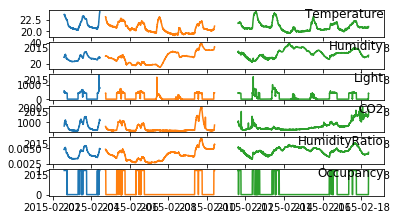

In [2]:
from pandas import read_csv
from matplotlib import pyplot
# load all data
data1 = read_csv('occupancy_data\datatest.txt', header=0, index_col=1, parse_dates=True, squeeze=True)
data2 = read_csv('occupancy_data\datatraining.txt', header=0, index_col=1, parse_dates=True, squeeze=True)
data3 = read_csv('occupancy_data\datatest2.txt', header=0, index_col=1, parse_dates=True, squeeze=True)
# determine the number of features
n_features = data1.values.shape[1]
pyplot.figure()
for i in range(1, n_features):
    # specify the subpout
    pyplot.subplot(n_features, 1, i)
    # plot data from each set
    pyplot.plot(data1.index, data1.values[:, i])
    pyplot.plot(data2.index, data2.values[:, i])
    pyplot.plot(data3.index, data3.values[:, i])
    # add a readable name to the plot
    pyplot.title(data1.columns[i], y=0.5, loc='right')
pyplot.show()

In [6]:
from pandas import read_csv
from pandas import concat
# load all data
data1 = read_csv('occupancy_data\datatest.txt', header=0, index_col=1, parse_dates=True, squeeze=True)
data2 = read_csv('occupancy_data\datatraining.txt', header=0, index_col=1, parse_dates=True, squeeze=True)
data3 = read_csv('occupancy_data\datatest2.txt', header=0, index_col=1, parse_dates=True, squeeze=True)
# vertically stack and maintain temporal order
data = concat([data1, data2, data3])
# save aggregated dataset
data.to_csv('occupancy_data\combined.csv')

In [7]:
# naive prediction model
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load the dataset
data = read_csv('occupancy_data/combined.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
values = data.values
# split data into inputs and outputs
X, y = values[:, :-1], values[:, -1]
# split the dataset
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=1)
 
# make a naive prediction
def naive_prediction(testX, value):
    return [value for x in range(len(testX))]
 
# evaluate skill of predicting each class value
for value in [0, 1]:
    # forecast
    yhat = naive_prediction(testX, value)
    # evaluate
    score = accuracy_score(testy, yhat)
    # summarize
    print('Naive=%d score=%.3f' % (value, score))

Naive=0 score=0.822
Naive=1 score=0.178


In [9]:
# logistic regression
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
# load the dataset
data = read_csv('occupancy_data/combined.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
values = data.values
# split data into inputs and outputs
X, y = values[:, :-1], values[:, -1]
# split the dataset
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=1)
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(trainX, trainy)
# predict the test set
yhat = model.predict(testX)
# evaluate model skill
score = accuracy_score(testy, yhat)
print(score)

0.9941634241245136


In [11]:
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
# load the dataset
data = read_csv('occupancy_data/combined.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
values = data.values
# basic feature selection
features = [0, 1, 2, 3, 4]
for f in features:
    # split data into inputs and outputs
    X, y = values[:, f].reshape((len(values), 1)), values[:, -1]
    # split the dataset
    trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=1)
    # define the model
    model = LogisticRegression()
    # fit the model on the training set
    model.fit(trainX, trainy)
    # predict the test set
    yhat = model.predict(testX)
    # evaluate model skill
    score = accuracy_score(testy, yhat)
    print('feature=%d, name=%s, score=%.3f' % (f, data.columns[f], score))

feature=0, name=date, score=0.822
feature=1, name=Temperature, score=0.799
feature=2, name=Humidity, score=0.822
feature=3, name=Light, score=0.991
feature=4, name=CO2, score=0.763
